# Введение в анализ данных
## Домашнее задание 2. `Pandas` и `Seaborn`


**Правила:**

* Дедлайн **30 апреля 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту `mipt.stats@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 2"`. Квадратные скобки обязательны.
* Прислать нужно ноутбук и его pdf-версию (без архивов). Названия файлов должны быть такими: `2.N.ipynb` и `2.N.pdf`, где `N` -- ваш номер из таблицы с оценками. *pdf-версию можно сделать с помощью Ctrl+P. Пожалуйста, посмотрите ее полностью перед отправкой. Если что-то существенное не напечатается в pdf, то баллы могут быть снижены.*
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код при проверке запускаться не будет.

**Баллы за задание:**

Легкая часть (достаточно на "хор"):

* Задача 1 -- 4 балла
* Задача 2 -- 2 балла

Сложная часть (необходимо на "отл"):

* Задача 3 -- 5 баллов
* Задача 4 -- 3 балла
* Задача 5 -- 8 баллов

Баллы за разные части суммируются отдельно, нормируются впоследствии также отдельно. Иначе говоря, 1 балл за легкую часть может быть не равен 1 баллу за сложную часть.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3)
%matplotlib inline

## Легкая часть

### Задача 1

Представьте, что вы министр образования страны котиков. Вам нужно решить какие школы лучше: маленькие или большие.

Вы решили, что нужно сравнить их по результатам единого кошачьего экзамена (ЕКЭ). Предлагается посмотреть на средний результат по школам: отсортировать по нему и сделать выводы исходя из топ 10 лучших школ.

Вам дан датасет `cat_exam_data.csv`

Описание данных:

* `school` -- номер школы;
* `test_score` -- результат одного ученика из этой школы;
* `number_of_students` -- кол-во учеников в школе.

Приведены данные по всем ученикам из 500 школ страны котиков.

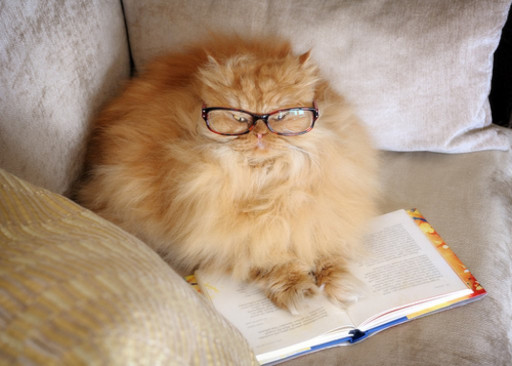

Загрузите датасет с результатами экзамена и посмотрите на первые пять строк.

Это можно сделать с помощью методов  <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html">read_csv</a> и <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html">head</a>.

In [23]:
from pathlib import Path
path = Path.cwd()
path = path.joinpath('../data/raw/Dataset_for_task2/')

cat_exam_data = pd.read_csv(path.joinpath('cat_exam_data.csv'), sep=',')
cat_exam_data.head()

,school,test_score,number_of_students
0,26,39.0,965
1,54,64.0,1483
2,356,64.0,1055
3,108,68.0,1806
4,298,78.0,971


Проверьте, что в данных нет пропусков (`NaN`). Если они есть:
* проверьте в каком столбце;
* удалите их.

Могут помочь методы <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html">isna</a> и <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html">dropna</a>.

In [4]:
# Get columns with 'Nan'.
print(cat_exam_data.columns[cat_exam_data.isna().any()].tolist())

# Drop 'Nan' values.
cat_exam_data = cat_exam_data.dropna()

['test_score']


Посчитайте описательные статистики (среднее, мин, макс, и тд.) по колонкам в таблице с помощью одной функции:

In [5]:
cat_exam_data.describe()

,school,test_score,number_of_students
count,501358.000000,501358.000000,501358.000000
mean,250.096795,51.681788,1088.910569
std,144.428420,14.179981,281.016801
min,0.000000,-0.000000,156.000000
25%,125.000000,42.000000,890.000000
50%,250.000000,52.000000,1079.000000
75%,377.000000,61.000000,1285.000000
max,499.000000,100.000000,1806.000000


Посчитайте сколько котиков получили 100 баллов:

In [6]:
cat_exam_data[cat_exam_data['test_score'] == 100].shape[0]

51

Выведите информацию о школах, где есть хотя бы один котик, получивший 100 баллов на ЕКЭ.

Отсортируйте эти школы по количеству стобалльников.

Могут помочь методы <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html">groupby</a>, <a href="https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.sort_values.html">sort_values</a>, <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html">transform</a> и <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html">count</a>.

In [7]:
pd.merge(
    cat_exam_data.groupby(by='school')['number_of_students'].mean(),
    cat_exam_data[cat_exam_data['test_score'] == 100] \
    .groupby(by='school')['test_score'].count().rename('100_score_students'),
    on='school', how='right'
).sort_values(by='100_score_students', ascending=False)

,number_of_students,100_score_students
school,,
486,800,2
4,1015,1
395,436,1
302,1517,1
303,701,1
315,580,1
328,789,1
342,920,1
346,913,1


Посчитайте средний результат каждой из школ и посмотрите на результат:

Может помочь метод <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html">mean</a>.

In [8]:
exam_data_mean_scored = pd.merge(
    cat_exam_data.groupby(by='school')['number_of_students'].mean(),
    cat_exam_data.groupby(by='school')['test_score'] \
    .mean().rename('mean_score'),
    on='school'
)

print(exam_data_mean_scored)

        number_of_students  mean_score
school                                
0                      418   52.294258
1                     1209   52.028950
2                     1035   51.751451
3                     1245   51.566265
4                     1015   51.025641
...                    ...         ...
495                   1139   50.933275
496                   1209   51.146402
497                   1140   51.141228
498                    796   51.709799
499                   1253   52.413738

[500 rows x 2 columns]


Отсортируйте школы по среднему результату:

In [9]:
exam_data_mean_scored = exam_data_mean_scored.sort_values(
    by='mean_score',
    ascending=False
)

Посмотрите на топ 10 лучших результатов:

In [10]:
exam_data_mean_scored.head(10)

,number_of_students,mean_score
school,,
57,560,53.341682
124,598,52.993311
263,669,52.982063
82,555,52.981982
366,773,52.970207
465,1179,52.957555
169,858,52.932401
449,357,52.910364
477,808,52.898515


**Вывод:** среди ТОП-$10$ лучших результатов почти все школы с числом учеников меньшим $1000$. 

Ожидаем, что внизу рейтинга будут только большие школы, давайте это проверим.

Посмотрите теперь на 10 худших школ:

In [11]:
exam_data_mean_scored.tail(10)

,number_of_students,mean_score
school,,
383,636,50.716981
264,929,50.702906
48,649,50.690293
156,1093,50.641354
394,1079,50.461538
194,774,50.406977
471,960,50.362500
486,800,50.325000
211,351,50.248571


**Вывод:** среди ТОП-$10$ худших результатов снова почти все школы с числом учеников меньшим $1000$. 

Постройте график зависимости среднего результата ЕКЭ от количества учеников:

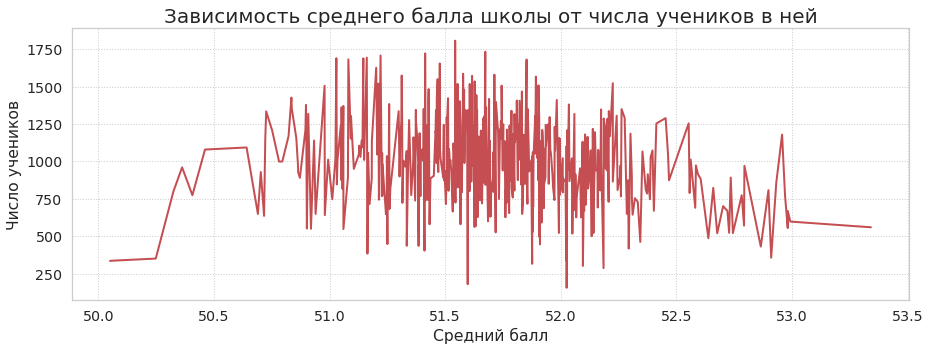

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15, 5))
plt.title('Зависимость среднего балла школы от числа учеников в ней', fontsize=20)

plt.plot(
    exam_data_mean_scored['mean_score'],
    exam_data_mean_scored['number_of_students'],
    color='r',
    linewidth=2
)
plt.xlabel('Средний балл')
plt.ylabel('Число учеников')
plt.grid(ls=':')
plt.show()

**Вывод:** нет чёткой зависимости величины среднего балла от числа учеников в школе: одному и тому же среднему баллу примерно в равной степени соответствуют как школы, имеющие больше $1000$ учеников, так и имющие меньше $1000$.

Но как же тогда решить какие школы лучше? 

Сгруппируйте учеников в зависимости от типа школы (<= 1000 учеников == маленькая школа):

In [13]:
exam_data_mean_scored['school_type'] = \
exam_data_mean_scored['number_of_students'] > 1000

Постройте гистограммы этих двух выборок на одном графике, установив параметры
* `bins=10` --- число бинов гистограммы;
* `alpha=0.5` --- прозрачность бинов.

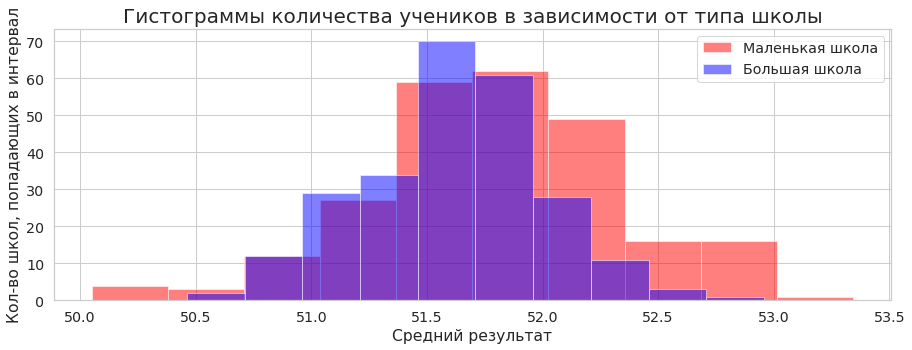

In [21]:
small_school = \
exam_data_mean_scored[np.logical_not(exam_data_mean_scored['school_type'])]
large_school = exam_data_mean_scored[exam_data_mean_scored['school_type']]

plt.figure(figsize=(15, 5))
plt.title('Гистограммы количества учеников в зависимости от типа школы', fontsize=20)

plt.hist(
    small_school['mean_score'],
    bins=10, 
    density=False,
    alpha=0.5,
    color='#ff0000',
    label='Маленькая школа'
)
plt.hist(
    large_school['mean_score'],
    bins=10, 
    density=False,
    alpha=0.5,
    color='#0000ff',
    label='Большая школа'
)

plt.legend()
plt.xlabel('Средний результат')
plt.ylabel('Кол-во школ, попадающих в интервал')
plt.show()

**Вывод:** средние результаты маленьких школ занимают больший диапазон значений, чем больших, но зато среди школ со средним баллом большим 52.0 находятся примущественно маленькие школы. Поэтому можно сделать вывод, что маленькие школы лучше больших.

### Задача 2

Задача заключается в работе с данными о трендах на YouTube. В этом вам поможет библиотека `seaborn`, которая была рассмотрена на одной из последних лекций.

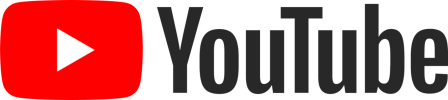


<b>1. Подготовка данных</b>

Скачайте файл `RUvideos_short.csv` с данными о видео в российском сегменте Youtube с 14 ноября по 21 ноября 2017 года. Полная версия данных доступна на <a href="https://www.kaggle.com/datasnaek/youtube-new#RUvideos.csv">kaggle</a>.

Прочитайте данные с помощью библиотеки `pandas` и напечатайте начало таблицы. В колонке `trending_date` записана дата. При чтении таблицы распознайте ее.

In [73]:
youtube_data = pd.read_csv(path.joinpath('RUvideos_short.csv'), sep=',')
youtube_data['trending_date'] = pd.to_datetime(youtube_data['trending_date'], format='%y.%d.%m')

youtube_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,gDuslQ9avLc,2017-11-14,Захар и Полина учатся экономить,Т—Ж БОГАЧ,22,2017-11-13T09:09:31.000Z,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"Знакомьтесь, это Захар и Полина. Вместе с ними..."
1,AOCJIFEA_jE,2017-11-14,Биржа Мемов #29. Большой выпуск,Druzhko Show,22,2017-11-13T17:32:11.000Z,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,"В 29 выпуске Дружко Шоу Сергей сказал, что Бир..."
2,VAWNQDgwwOM,2017-11-14,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,24,2017-11-13T16:11:31.000Z,"юмор|""комедия""|""влог""|""блог""|""смешно""|""смешное...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Факультет #Кап...
3,gknkFwKQfHg,2017-11-14,Сочная кесадилья с курицей,Hochland,22,2017-11-13T06:51:10.000Z,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** как готовить ресторанные блюда дома
4,3sYvZcwzZr8,2017-11-14,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Совергон,24,2017-11-13T16:52:36.000Z,"Совергон|""Sovergon""|""клипы""|""родители""|""школа""...",243469,36216,631,1692,https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg,False,False,False,❏ КОНКУРС КАПИТАНЫ: http://kapitany.ru/!Soverg...


В таблице много лишних данных. Оставьте следующие столбцы:
* `trending_date` -- дата в формате год-день-месяц;
* `category_id` -- категория видео, названия приведены в файле `RU_category_id.json`;
* `views` -- количество просмотров видео;
* `likes` -- количество лайков;
* `dislikes` -- количество дислайков;
* `comment_count` -- количество комментариев.

Из даты оставьте только день. Для этого можно пройтись циклом по всем датам и взять поле `day` у даты. Напечатайте начало таблицы.

In [74]:
youtube_data = youtube_data[[
    'trending_date',
    'category_id',
    'views',
    'likes',
    'dislikes',
    'comment_count']]
youtube_data['trending_date'] = \
youtube_data['trending_date'].transform(lambda x: x.day)

youtube_data.head()

,trending_date,category_id,views,likes,dislikes,comment_count
0,14,22,62408,334,190,50
1,14,22,330043,43841,2244,2977
2,14,24,424596,49854,714,2944
3,14,22,112851,3566,122,80
4,14,24,243469,36216,631,1692


<b>2. Некоторая визуализация</b>

Постройте ящики с усами на каждый день по количеству просмотров. Насколько хороший получился график?

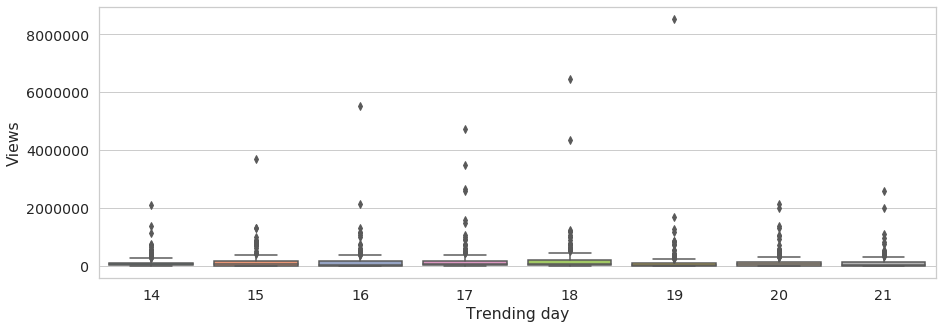

In [75]:
with sns.plotting_context(font_scale=1.5), sns.axes_style("whitegrid"):
    plt.figure(figsize=(15, 5))
    sns.boxplot(
        x='trending_date',
        y='views', 
        data=youtube_data,
        palette='Set2'
    ).set(
        xlabel='Trending day', 
        ylabel='Views'
    )
    plt.show();

Исправьте этот недостаток, установив некоторое значение.

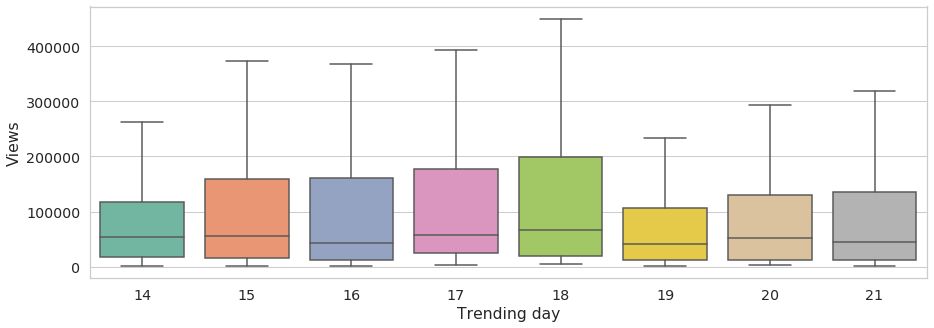

In [76]:
with sns.plotting_context(font_scale=1.5), sns.axes_style("whitegrid"):
    plt.figure(figsize=(15, 5))
    sns.boxplot(
        x='trending_date',
        y='views', 
        data=youtube_data,
        palette='Set2',
        showfliers=False
    ).set(
        xlabel='Trending day', 
        ylabel='Views'
    )
    plt.show();

Постройте jointplot по всем данным для количества просмотров по горизонтальной оси и количества лайков по вертикальной. Насколько информативен такой график?

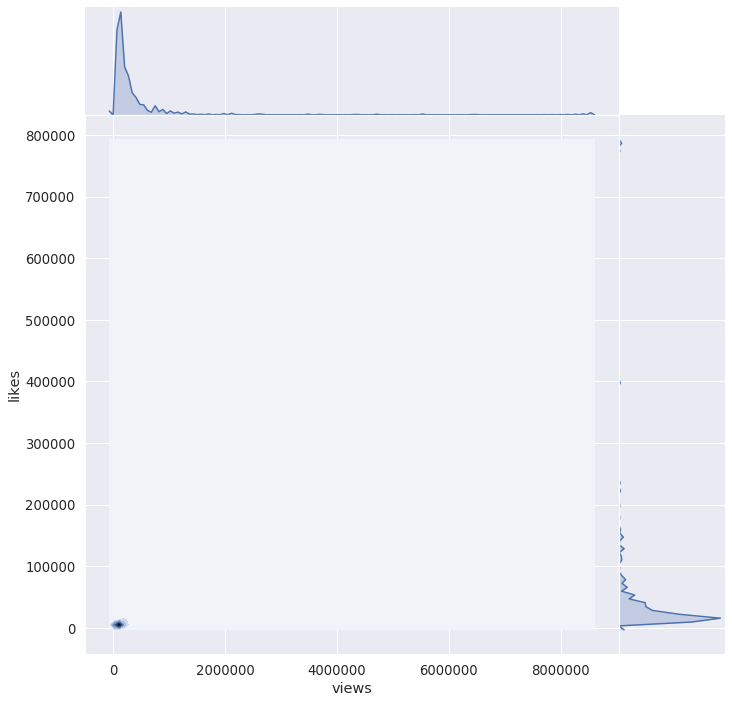

In [77]:
with sns.plotting_context("notebook", font_scale=1.2), sns.axes_style("darkgrid"):
    sns.jointplot(
    x='views',
    y='likes',
    data=youtube_data,
    kind='kde',
    height=10,
    space=0);

Исправьте этот недостаток.

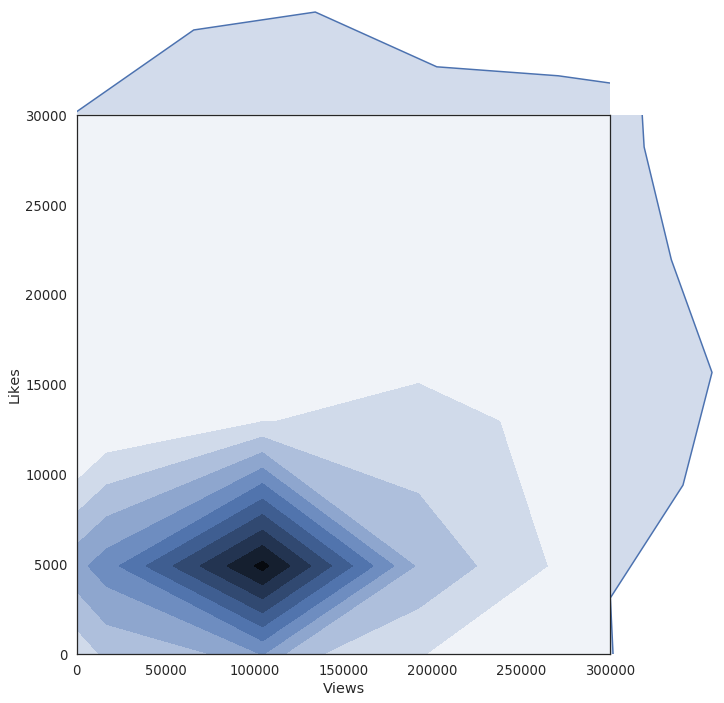

In [96]:
with sns.plotting_context("notebook", font_scale=1.2), sns.axes_style("white"):
    plot = sns.jointplot(
        x='views',
        y='likes',
        data=youtube_data,
        kind='kde',
        height=10,
        space=0,
        xlim=None,
        ylim=None
    )
    plot.ax_joint.set_xlim(0, 300000)
    plot.ax_joint.set_ylim(0, 30000)
    plot.set_axis_labels('Views', 'Likes');


---
## Сложная часть

### Задача 3

Netflix за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  


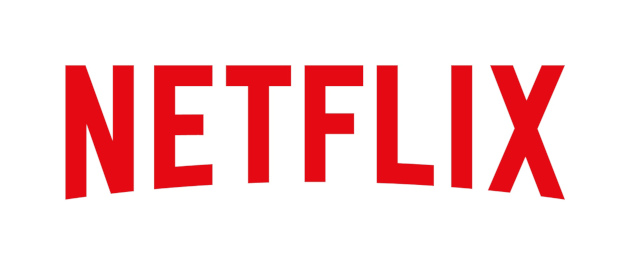

Описание признаков:
* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.


Загрузите данные, выполнив код ниже.

In [97]:
# код ниже менять нельзя (кроме пути до данных), просто запустите ячейку!
data = pd.read_csv(path.joinpath('netflix_data.csv'), encoding='cp437')
del data['ratingDescription'], data['user rating size']

Удалите из данных дупликаты. Сколько объектов удалено?

In [101]:
old_size = data.size

data.drop_duplicates()
new_size = data.size

print('Строк удалено: {}.'.format(old_size - new_size))

Строк удалено: 0.


Сколько объектов осталось?

In [ ]:
...

Сколько рейтинговых групп представлено в данных?

In [ ]:
...

Какие оценки пользователи ставят чаще? Постройте гистограмму оценок.

In [ ]:
...

**Вывод:** <...>

Выведите основную информацию об оценках пользователей: среднее, стандартное отклонение, минимум, максимум, медиана. Отличаются ли медиана и среднее? Могут ли данные характеристики значительно отличаться? Почему?

In [ ]:
...

**Ответ:** <...>

В какие годы были запущены шоу, представленные в датасете?

In [ ]:
...

Постройте график, показывающий распределение количества запущенных шоу в зависимости от года. Наблюдается ли рост? Есть ли выбросы?

In [ ]:
...

**Вывод:** <...>

Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017. Можно ли сделать вывод, что 2017 год успешнее для Netflix? ("Успешнее" значит, что пользователи в среднем ставили более высокие оценки)
Ответить на этот вопрос вам поможет график, который вы построили выше.

In [ ]:
...

**Вывод:** <...>

Ниже представлены два графика, показывающие распределение шоу по рейтинговым группам. Какой тип графика визуально более интерпретируемый? ([Подсказка](https://sun9-40.userapi.com/c854228/v854228652/c754f/j6z5gMjJy2k.jpg))  
Постройтре самостоятельно график, который считаете более интерпретируемым. Сделайте вывод.

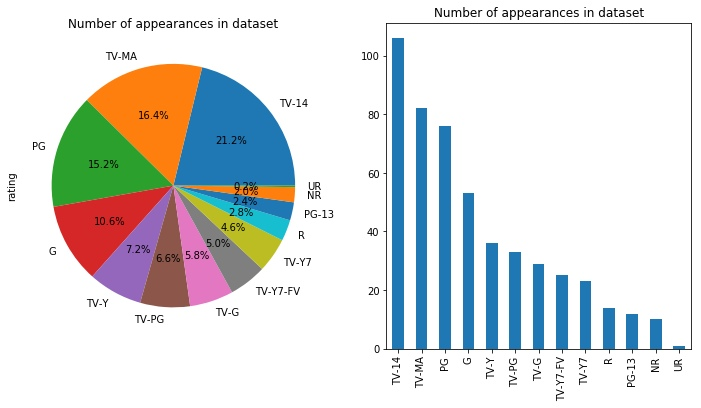

In [ ]:
...

**Вывод:** <...>

Составьте топ-13 самых высоко оцененных шоу. Выберите из данного топа шоу, которое вам наиболее нравится (либо используйте `scipy.stats.randint`). Обозначим это шоу N.
Ответьте на следующие вопросы:  
* Какое шоу является худшим по оценкам в рейтинговой группе, к которой принадлежит N?  
* Сколько шоу было выпущено в одном году с N?  
* Насколько бы изменилась средняя оценка шоу, выпущенных в одном году с N, если бы Netflix не запустили шоу N?

In [ ]:
...

Ответьте на следующие вопросы при помощи `boxplot`:
* Какую рейтинговую группу зрители оценивали выше всего в последние пять лет? 
* Как менялись оценки пользователей с течением времени? Постройте `boxplot` для каждого десятилетия.

In [ ]:
...

**Вывод:** <...>

---
### Задача 4

В данной задаче вам нужно будет продолжить анализ данных о видео на YouTube. Информация об имени категории видео содержится в файле `RU_category_id.json`. Следующий код читает этот файл, извлекает из него необходимую информацию, и записывает в виде `pandas`-таблицы.

In [ ]:
import json

with open('./RU_category_id.json') as json_file:
    json_data = json.load(json_file)
    
category = pd.DataFrame(columns=['id', 'name'])

for item in json_data['items']:
    category = category.append(
        {'id': int(item['id']),
         'name': item['snippet']['title']},
        ignore_index=True
    )
    
category['id'] = category['id'].astype(int)
category

Добавьте к вашим данным имена категорий с помощью `pd.merge`.

In [ ]:
...

Составьте сводную таблицу о количестве просмотров по дням для каждой категории видео с помощю функции `pivot_table`.

In [ ]:
...

Визуализируйте таблицу с помощью `heatmap`. Для информативности поделите все числа на $10^6$.

In [ ]:
...

Сделайте аналогичную сводную таблицу, добавив суммы по строкам и столбцам, назвав их "Всего просмотров".

In [ ]:
...

В чем проблема с информативностью подобных таблиц? Исправьте это.

*Подсказка*: посмотрите на графики, которые вы построили ранее. 

In [ ]:
...

**Вывод:** <...>

---

### Задача 5

Yelp (yelp.com) — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

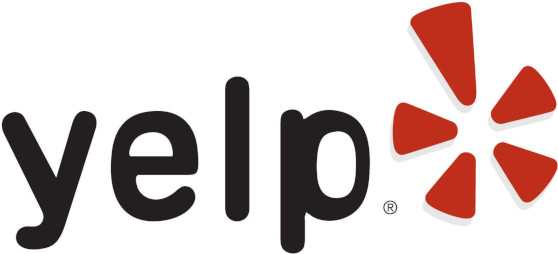

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате json можно посмотреть по ссылке
https://www.kaggle.com/yelp-dataset/yelp-dataset/data

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. Пример с несколько другой задачей: https://yandex.ru/company/researches/2017/msk_mobile_map
* А также найти рестораны с наилучшими отзывами.

------

#### Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. Для этого стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`. В таблице должен быть указан город (название) и количество компаний в этом городе.

Пусть N -- город с наибольшим количеством компаний.

Оставьте в таблице только записи, соответствующие городу N. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ -- долготу.

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. 

На этом графике должны выделяться некоторые улицы. Откройте карту города N и сравните ее с построенным графиком.

Попробуйте также автоматически подгружать карту города в качестве фона графика. <a href="https://plotly.com/python/scattermapbox/">Примеры.</a>

#### Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [ ]:
...

В подгруженной таблице оценок оставьте только компании города N. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [ ]:
...

Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [ ]:
...

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы.

In [ ]:
...

Соедините две полученные ранее таблицы по компаниям города N в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index` (в одной из них это уже должно было быть сделано).
Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, `stars`, `count`.

In [ ]:
...

Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$.

In [ ]:
...

Чтобы получить районы города, округлите значения широты и долготы, подобрав оптимальный размер района. Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [ ]:
...

Для получения средней оценки компании по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений -- оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

In [ ]:
...

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** <...>

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

In [ ]:
...

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** <...>

#### Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `Restaurant`. Составьте таблицу, в которой будет информация о всех ресторанах города N, для которых имеется не менее $5$ отзывов. Далее постройте график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

In [ ]:
...

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** <...>

Кот Василий очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [ ]:
...

Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [ ]:
...

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** <...>